In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df1 = df
df1.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### MultilinearRegression

In [6]:
df2 = df[['age','bmi','charges']]
df2.head(10)

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
5,31,25.740,3756.62160
6,46,33.440,8240.58960
7,37,27.740,7281.50560
8,37,29.830,6406.41070
9,60,25.840,28923.13692


1338
47


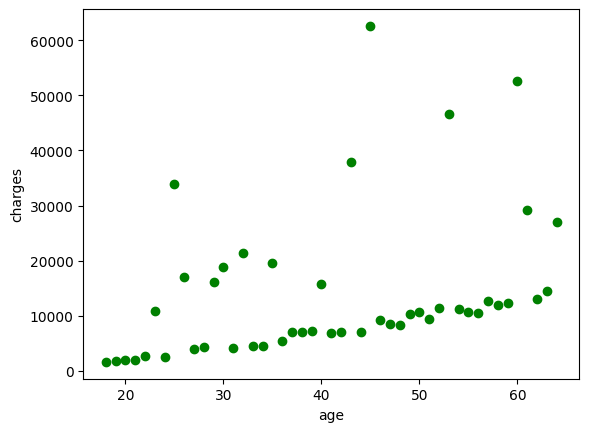

In [7]:
#Linear Regression


df3 = df2.duplicated(subset='age')
print(len(df3))

df3 = df2.drop_duplicates(subset='age',keep='last')
print(len(df3))

plt.scatter(df3['age'],df3['charges'],color='g')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

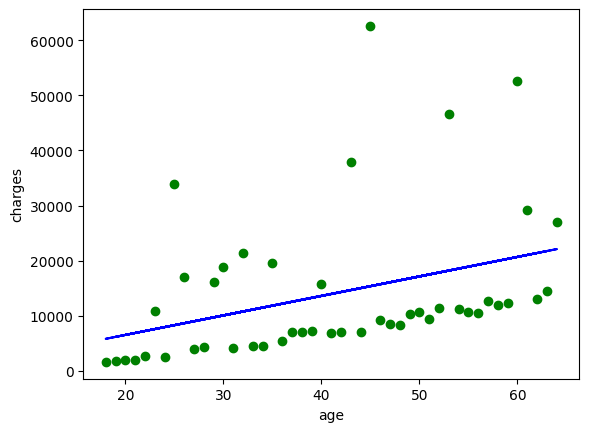

In [8]:

# For age and charges

X = np.asanyarray(df3['age']).reshape(-1,1)
y = np.asanyarray(df3['charges'])
# print(len(X))
# print(len(y))

model_age = linear_model.LinearRegression()
reg = model_age.fit(X,y)
plt.scatter(df3['age'],df3['charges'],color='g')
plt.plot(X,reg.predict(X),color='b')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()



In [9]:
df4 = df2
print(len(df4))

1338


In [10]:
df4 = df2.duplicated(subset='bmi')
df4 = df2.drop_duplicates(subset='bmi',keep='last')
print(len(df4))

548


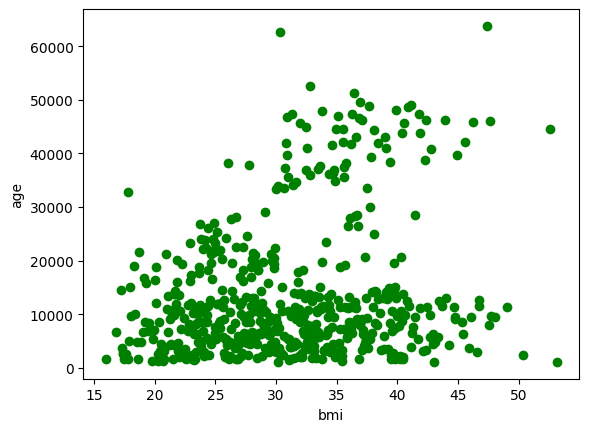

In [11]:
plt.scatter(df4['bmi'],df4['charges'],color='g')
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

True


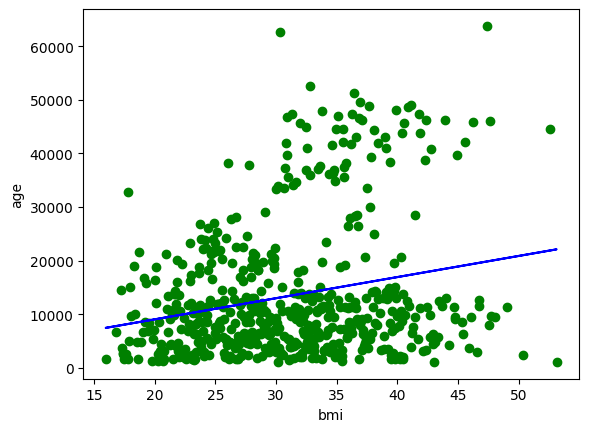

In [12]:
X = np.asanyarray(df['bmi']).reshape(-1,1)
y = np.asanyarray(df['charges'])
if(len(X) == len(y)):
    print(True)
model_bmi = linear_model.LinearRegression()
reg_bmi = model_bmi.fit(X,y)
pred_bmi = reg_bmi.predict(X)

plt.scatter(df4['bmi'],df4['charges'],color='g')
plt.plot(X,pred_bmi,color='b')
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

In [13]:
df5 = df2 
df5.shape


(1338, 3)

In [14]:
df6 = df5.duplicated(subset='charges')
df6 = df5.drop_duplicates(subset='charges',keep='last')
df6.shape

(1337, 3)

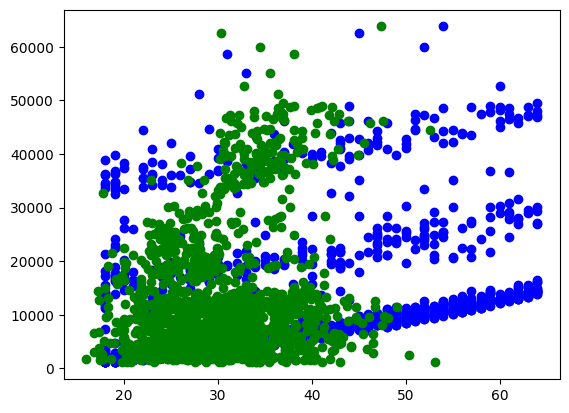

In [15]:
plt.scatter(df6['age'],df6['charges'],color='b')
plt.scatter(df6['bmi'],df6['charges'],color='g')
plt.show()

In [16]:
X = df6[['age','bmi']]
y = df6['charges']

Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=0)
print('Xtrain: ',Xtrain.shape)
print('Xtest: ',Xtest.shape)
print('ytrain: ',ytrain.shape)
print('ytest: ',ytest.shape)

Xtrain:  (1069, 2)
Xtest:  (268, 2)
ytrain:  (1069,)
ytest:  (268,)


In [17]:
model_combined = linear_model.LinearRegression()
regr = model_combined.fit(Xtrain,ytrain)
y_pred = regr.predict(Xtest)
y_pred.shape


(268,)

In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytest,y_pred)

9318.087572303704

In [35]:
print('Intercept: ',regr.intercept_)
print('Coefficients: ',regr.coef_)

Intercept:  -3489.319029805154
Coefficients:  [224.95843649 249.25928836]


<function matplotlib.pyplot.show(close=None, block=None)>

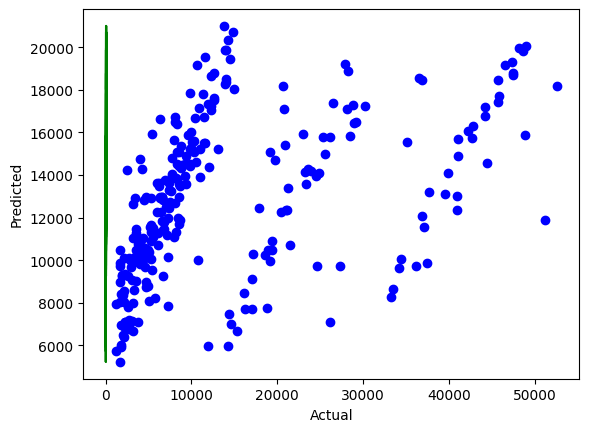

In [38]:
plt.scatter(ytest,y_pred,color='b')
plt.plot(Xtest,regr.predict(Xtest),color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show